In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

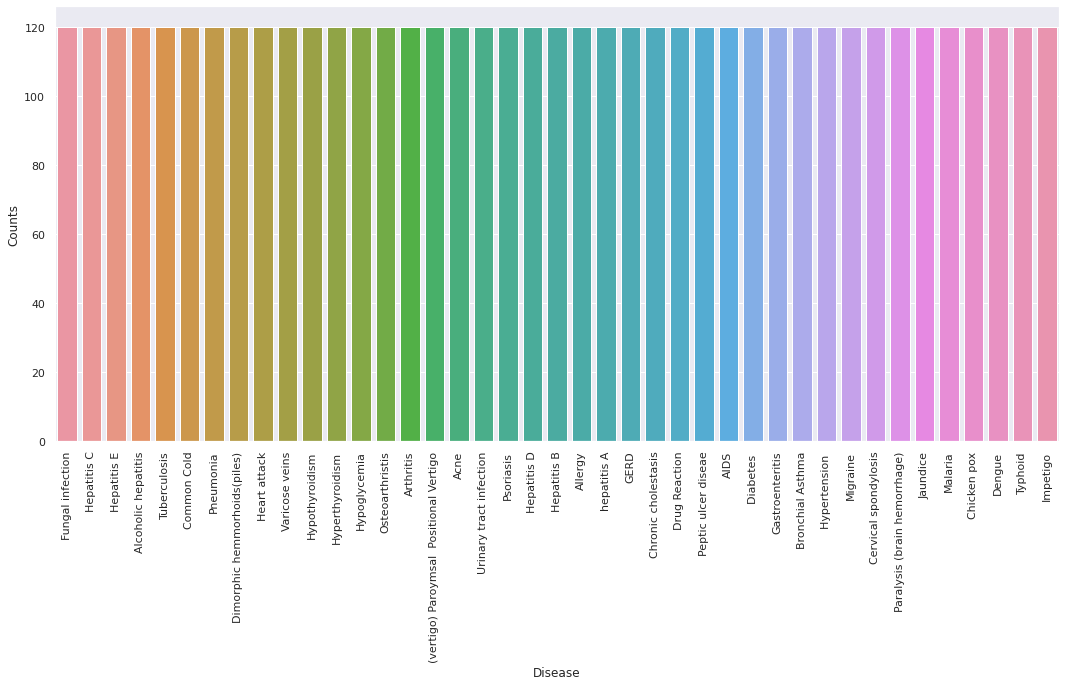

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "/content/drive/MyDrive/CodeFiles/HealthXoxo/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)
 
# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(133)
memory usage: 5.0 MB


In [ ]:
data.head(5)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


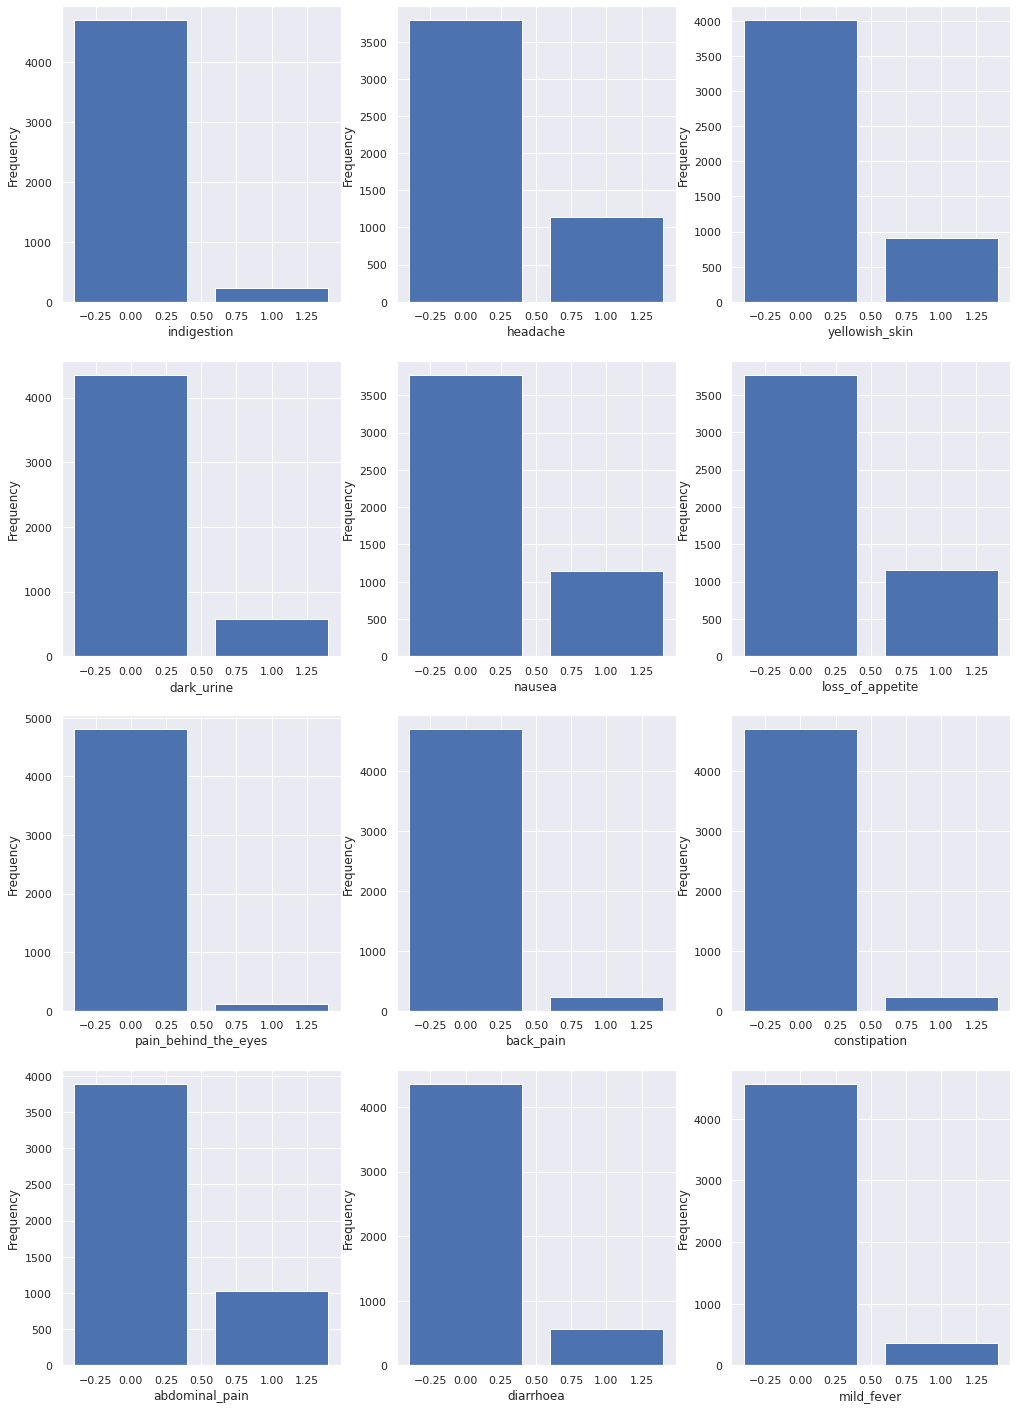

In [ ]:
# lets visualize some of features
features = ['indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
       'abdominal_pain', 'diarrhoea', 'mild_fever']

plt.figure(figsize = (17,25))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    plt.bar(train_df[feature].value_counts().index.to_numpy(), train_df[feature].value_counts().values)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
plt.show()

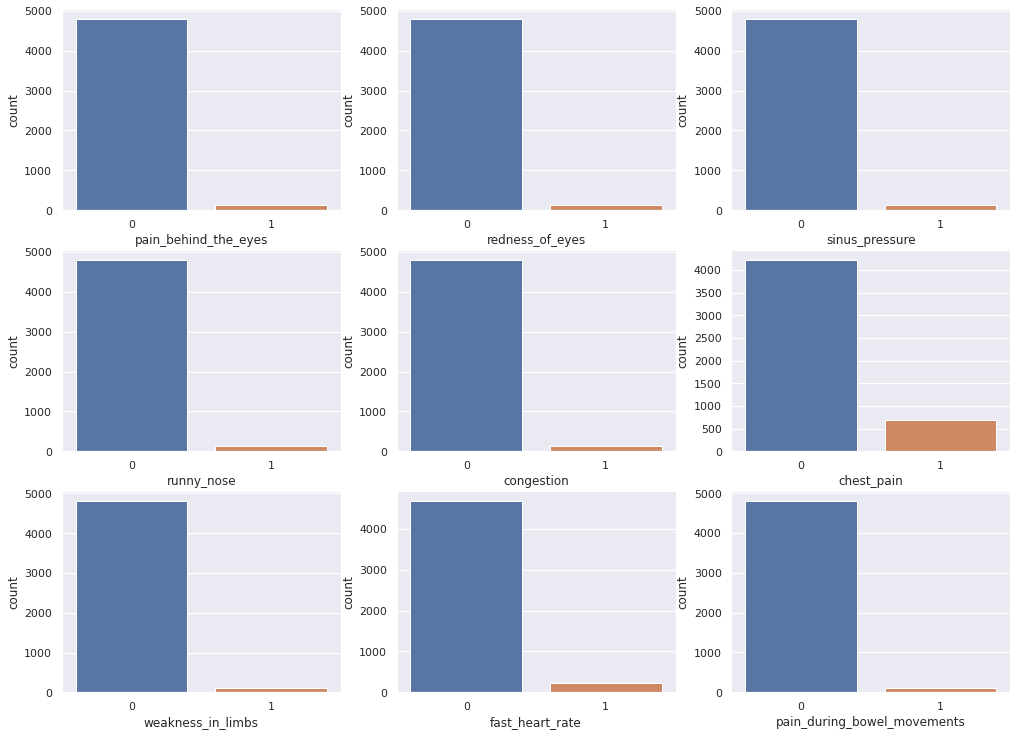

In [ ]:
# visualize it with seaborn library one more time
features = ['pain_behind_the_eyes', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion',
       'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements']

plt.figure(figsize = (17,17))
for i, feature in enumerate(features):
    plt.subplot(4,3,i+1)
    sns.countplot(x = feature, data = train_df)
    plt.xlabel(feature)
plt.show()

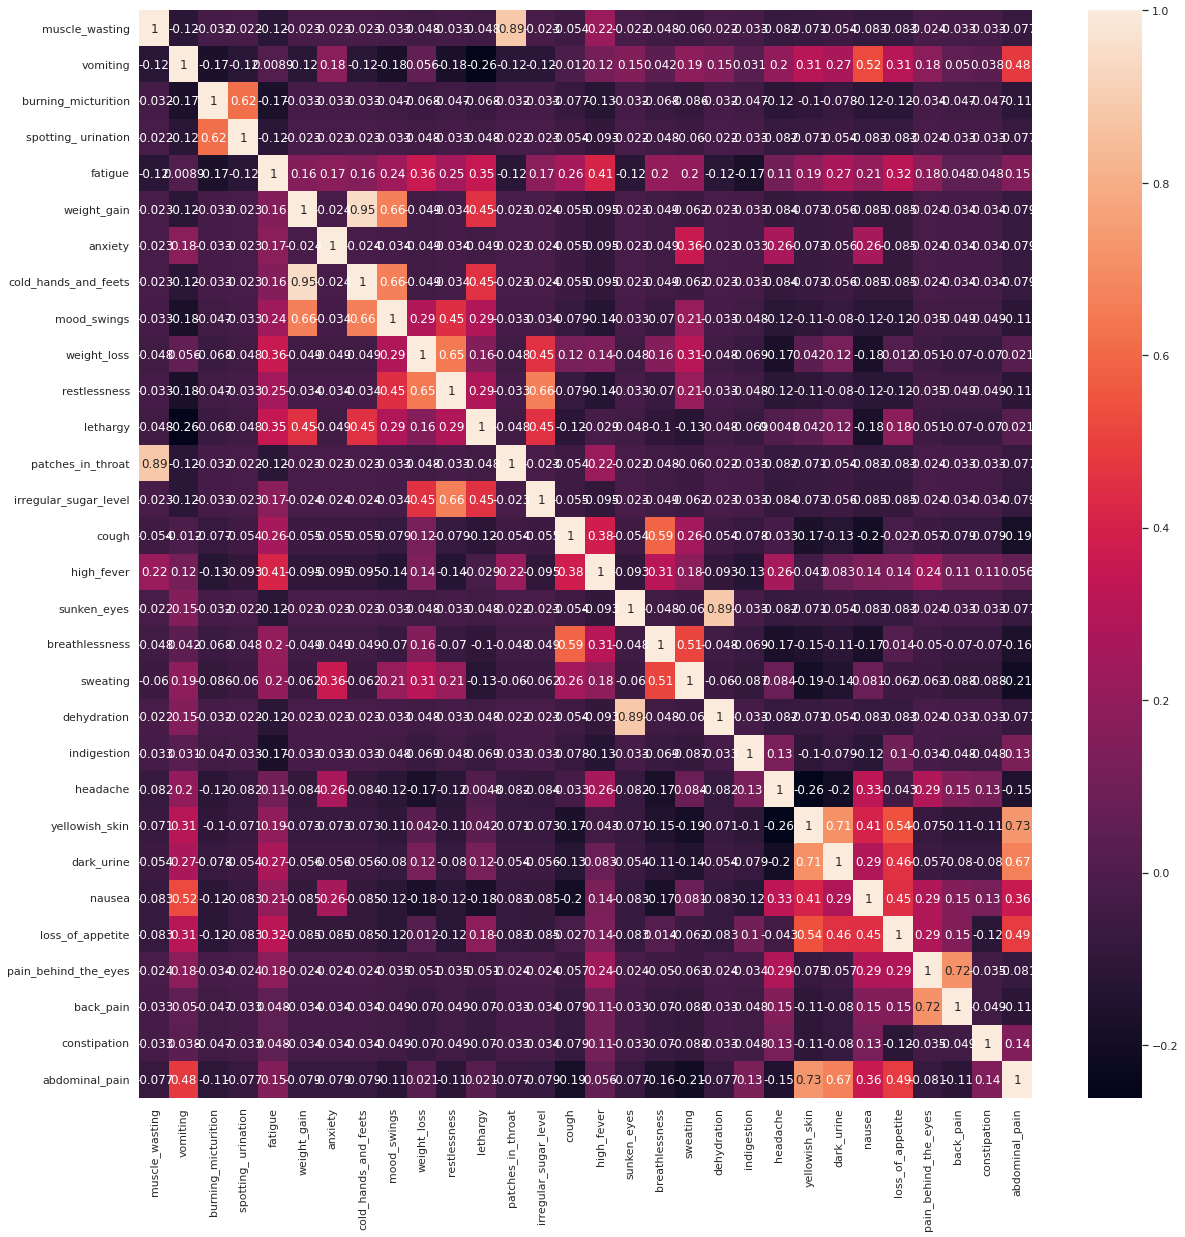

In [ ]:
# linear relationships between some of features using correlation heatmap: for example which symptoms occur together?
df_corr = train_df.iloc[:, 10:40]
plt.figure(figsize = (20, 20))
sns.heatmap(df_corr.corr(), annot = True)
plt.show()

In [ ]:
# drop unnamed feature from train data
train_df.drop("Unnamed: 133", axis = 1, inplace = True)
# train_df["Unnamed: 133"]  # it's not here anymore

# **Splitting the data for training and testing the model**


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


# **Model Building**

## Using K-Fold Cross-Validation for model selection 



In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")



SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


## Building robust classifier by combining all models: 

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


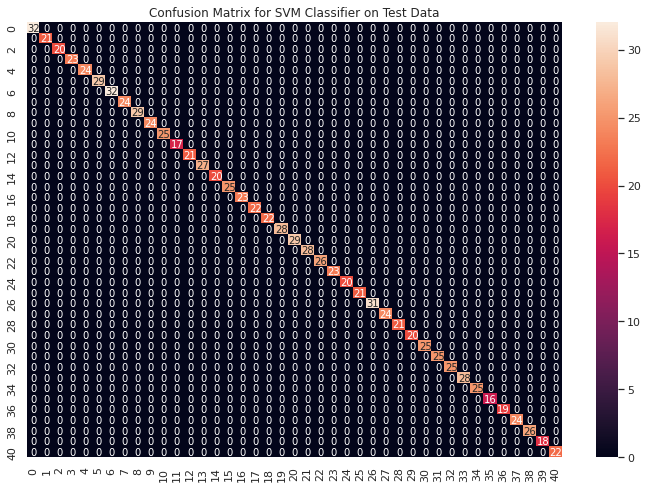

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


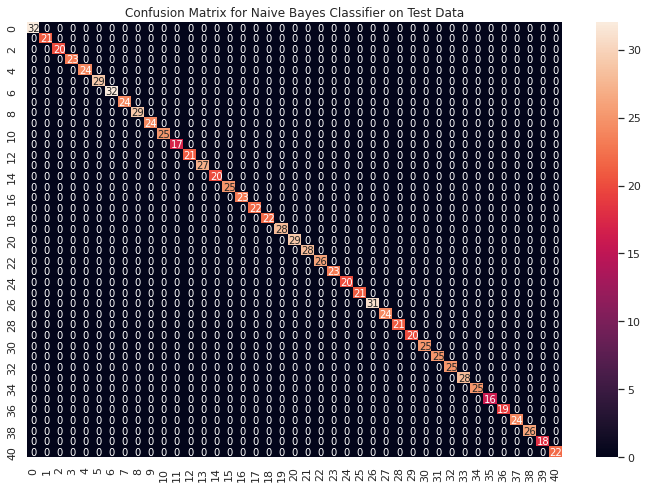

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


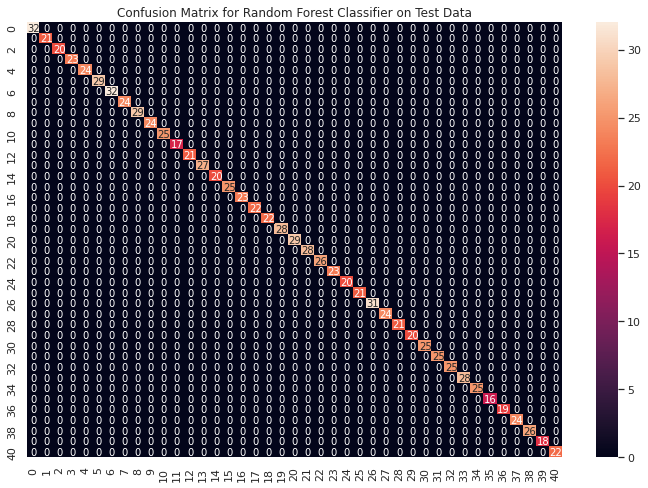

In [ ]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


## Fitting the model on whole data and validating on the Test dataset: 



Accuracy on Test dataset by the combined model: 100.0


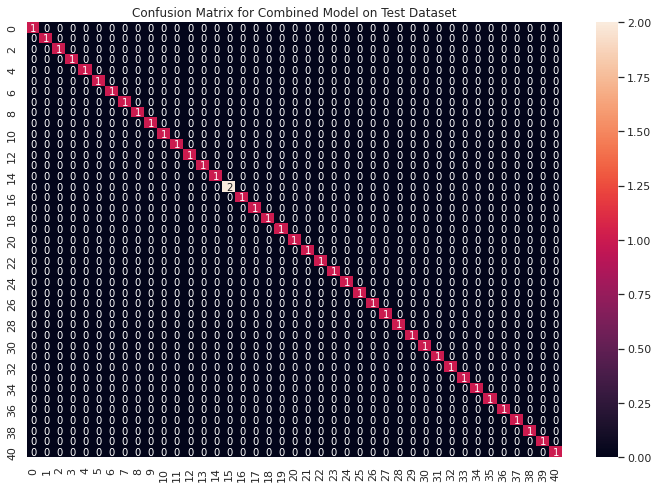

In [ ]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("/content/drive/MyDrive/CodeFiles/HealthXoxo/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,
			k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


## Creating a function that can take symptoms as input and generate predictions for disease 



In [ ]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		#"rf_model_prediction": rf_prediction,
		#"naive_bayes_prediction": nb_prediction,
		#"svm_model_prediction": nb_prediction,
		"final_prediction":final_prediction
	}
	return predictions

# ***PREDICTIONS***

In [ ]:
prognosis = train_df['prognosis'].unique()
print(prognosis)

## There are 133 symptoms in this dataset:


In [ ]:
#print(data.columns.values)

'''
['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'
 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'
 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'
 'spotting_ urination' 'fatigue' 'weight_gain' 'anxiety'
 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'
 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'
 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'
 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'
 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'
 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'
 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'
 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'
 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'
 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'
 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'
 'pain_in_anal_region' 'bloody_stool' 'irritation_in_anus' 'neck_pain'
 'dizziness' 'cramps' 'bruising' 'obesity' 'swollen_legs'
 'swollen_blood_vessels' 'puffy_face_and_eyes' 'enlarged_thyroid'
 'brittle_nails' 'swollen_extremeties' 'excessive_hunger'
 'extra_marital_contacts' 'drying_and_tingling_lips' 'slurred_speech'
 'knee_pain' 'hip_joint_pain' 'muscle_weakness' 'stiff_neck'
 'swelling_joints' 'movement_stiffness' 'spinning_movements'
 'loss_of_balance' 'unsteadiness' 'weakness_of_one_body_side'
 'loss_of_smell' 'bladder_discomfort' 'foul_smell_of urine'
 'continuous_feel_of_urine' 'passage_of_gases' 'internal_itching'
 'toxic_look_(typhos)' 'depression' 'irritability' 'muscle_pain'
 'altered_sensorium' 'red_spots_over_body' 'belly_pain'
 'abnormal_menstruation' 'dischromic _patches' 'watering_from_eyes'
 'increased_appetite' 'polyuria' 'family_history' 'mucoid_sputum'
 'rusty_sputum' 'lack_of_concentration' 'visual_disturbances'
 'receiving_blood_transfusion' 'receiving_unsterile_injections' 'coma'
 'stomach_bleeding' 'distention_of_abdomen'
 'history_of_alcohol_consumption' 'fluid_overload.1' 'blood_in_sputum'
 'prominent_veins_on_calf' 'palpitations' 'painful_walking'
 'pus_filled_pimples' 'blackheads' 'scurring' 'skin_peeling'
 'silver_like_dusting' 'small_dents_in_nails' 'inflammatory_nails'
 'blister' 'red_sore_around_nose' 'yellow_crust_ooze'

 '''

"\n['itching' 'skin_rash' 'nodal_skin_eruptions' 'continuous_sneezing'\n 'shivering' 'chills' 'joint_pain' 'stomach_pain' 'acidity'\n 'ulcers_on_tongue' 'muscle_wasting' 'vomiting' 'burning_micturition'\n 'spotting_ urination' 'fatigue' 'weight_gain' 'anxiety'\n 'cold_hands_and_feets' 'mood_swings' 'weight_loss' 'restlessness'\n 'lethargy' 'patches_in_throat' 'irregular_sugar_level' 'cough'\n 'high_fever' 'sunken_eyes' 'breathlessness' 'sweating' 'dehydration'\n 'indigestion' 'headache' 'yellowish_skin' 'dark_urine' 'nausea'\n 'loss_of_appetite' 'pain_behind_the_eyes' 'back_pain' 'constipation'\n 'abdominal_pain' 'diarrhoea' 'mild_fever' 'yellow_urine'\n 'yellowing_of_eyes' 'acute_liver_failure' 'fluid_overload'\n 'swelling_of_stomach' 'swelled_lymph_nodes' 'malaise'\n 'blurred_and_distorted_vision' 'phlegm' 'throat_irritation'\n 'redness_of_eyes' 'sinus_pressure' 'runny_nose' 'congestion' 'chest_pain'\n 'weakness_in_limbs' 'fast_heart_rate' 'pain_during_bowel_movements'\n 'pain_in_ana


# These are the types Diseases that can be predicted using the model
*   Fungal infection
*   Allergy
*   GERD
*   Chronic cholestasis
*   Drug Reaction
*   Peptic ulcer diseae
*   AIDS
*   Diabetes
*   Gastroenteritis
*   Bronchial Asthma
*   Hypertension 
*   Migraine
*   Cervical spondylosis
*   Paralysis (brain hemorrhage)
*   Jaundice
*   Malaria
*   Chicken pox
*   Dengue
*   Typhoid
*   Hepatitis A
*   Hepatitis B
*   Hepatitis C
*   Hepatitis D
*   Hepatitis E
*   Alcoholic hepatitis
*   Tuberculosis
*   Common Cold
*   Pneumonia
*   Dimorphic hemmorhoids(piles)
*   Heart attack
*   Varicose veins
*   Hypothyroidism
*   Hyperthyroidism
*   Hypoglycemia
*   Osteoarthristis
*   Arthritis
*   (vertigo) Paroymsal  Positional Vertigo
*   Acne
*   Urinary tract infection
*   Psoriasis
*   Impetigo

In [ ]:
# Testing the function
#e.g symptoms: Itching,Skin Rash,Nodal Skin Eruptions
# Disease: 'Fungal infection'
symptoms_input = input("Enter the symptoms seperated with commas: ")
print(predictDisease(symptoms_input))

Enter the symptoms seperated with commas: Itching,Skin Rash,Nodal Skin Eruptions
{'final_prediction': 'Fungal infection'}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
